In [2]:
import pandas as pd
import numpy as np
from random import sample 
import sys 
#sys.path.insert(0, 'scripts/FINE/')
#from utils import *
import random

In [31]:
# IFD      
df= pd.read_csv('dataRaw/log2.csv')

to_repl = {'allow':0, 'drop':1, 'deny':2, 'reset-both':3}
df['Label'] = df['Action'].replace(to_repl)
print(df.shape)

df = df.drop(columns = 'Action')
print(df.shape)

# delete one class since the frequency is almost zero
df = df[df['Label']!=3]

print(df.shape)

df.to_csv('dataProduced/IFD.csv.gz', sep = '\t',
                                  index = None, compression = 'zip' )


(65532, 13)
(65532, 12)
(65478, 12)


In [30]:
df = df[df['Label']!=3]
df['Label'].value_counts()

0    37640
2    14987
1    12851
Name: Label, dtype: int64

In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from scipy.sparse import csc_matrix

file = 'dataRaw/RNA-seq/atlas/raw_counts.mtx'
df = pd.read_csv(file,sep = ' ', skiprows = 2, header = None, 
               #  nrows = 2000000, 
                 dtype = {0: 'int16', 1: 'int32', 2: 'int16'})


row = df[1].to_numpy()
col = df[0].to_numpy()
data = df[2].to_numpy()
d = pd.DataFrame(csc_matrix((data, (row, col))).toarray())
d[0].sum()

d = d[1:]


n_components = d.shape[0]
n_components = 50


reducer = umap.UMAP(n_components = n_components)
scaled_data = StandardScaler().fit_transform(d.values)
embedding = reducer.fit_transform(scaled_data)
pd.DataFrame(embedding).to_csv('dataProduced/rnaUMAP.csv.gz',sep = '\t', index = None, 
                               header = None, compression = 'zip')

In [ ]:
modelsR = [ 
            'AENN(df)' 
            ,'BBNR(df, k = k)'
           ,'C45robustFilter(df)'
           ,'C45votingFilter(df, nfolds = nfolds, consensus = FALSE)'
           ,'C45iteratedVotingFilter(df, nfolds = nfolds, consensus = FALSE)'
           ,'CNN(df)'
           ,'CVCF(df, nfolds = nfolds, consensus = FALSE)'
           ,'DROP1(df, k = 1)'
           ,'DROP2(df, k = 2)'
           ,'DROP3(df, k = 3)'
           ,'dynamicCF(df, nfolds = nfolds, consensus = FALSE, m = 3)'
           ,'edgeBoostFilter(df, m = 15, percent = 0.05, threshold = 0.2)'
           ,'EF(df, nfolds = nfolds, consensus = TRUE)'
           ,'ENG(df, graph = "RNG")'
           ,'EWF(df, threshold = 0.25, noiseAction = "remove")'
           ,'GE(df, k = k, kk = ceiling(k/2))'
           ,'HARF(df, nfolds = nfolds, agreementLevel = 0.7, ntrees = 500)'
           ,'hybridRepairFilter(df, consensus = FALSE, noiseAction = "remove")'
           ,'INFFC(df, consensus = FALSE, p = 0.01, s = 1, k = k, threshold = 0)'
           ,'IPF(df, nfolds = nfolds, consensus = FALSE, p = 0.01, s = 3, y = 0.5)'
           ,'ModeFilter(df, type = "classical", noiseAction = "repair", epsilon = 0.05, maxIter = 100, alpha = 1, beta = 1)'
           ,'ORBoostFilter(df, N = 20, d = 11, Naux = max(20, N), useDecisionStump = FALSE)'
           ,'PF(df, nfolds = nfolds, consensus = FALSE, p = 0.01, s = 3, y = 0.5, theta = 0.7)'
           ,'PRISM(df)'
           ,'RNN(df)'
           ,'saturationFilter(df, noiseThreshold = noiseThreshold)'
           ,'consensusSF(df, nfolds = nfolds, consensusLevel = nfolds - 1, noiseThreshold = noiseThreshold)'
           ,'classifSF(df, nfolds = nfolds, noiseThreshold = noiseThreshold)'
           ,'TomekLinks(df)'
]



In [6]:
import sys
import numpy as np
import random
import pandas as pd
import warnings 
from time import time
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import traceback
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings('ignore')
sys.path.insert(0, 'scripts/')

from runRFilter import *
from cleanLabFilter import CleanLab
from filtersScikiClean import filtersScikiClean
from utils import *
from addNoiseScikit import *
from DNNwERLLoss import DNNwERLLoss



#path = str(snakemake.output)
#path = 'temp/Encode_0.1_100_Asym_KDN_Python.tmp'
path = 'temp/ClinVarArt_0.1_100_Asym_ERL_DNN.tmp'
path = 'temp/ClinVarReal_0.2_1000_Sym_ERL_DNN.tmp'
st  = path.split('/')[1].split('.tmp')[0].split('_')
print(st)
name = st[0]
noiseLevel = float(st[1])
datasetSize = int(st[2])
noiseType = st[3]
model = st[4]
imp = st[5]
repeats= 1

#repeats = int(snakemake.params.repeats)

df = pd.read_csv('datasets/' + name + '.csv.gz', sep = '\t',compression='zip',
                index_col=None)
df = df.fillna(0)
ID = [name, model, noiseLevel, noiseType,datasetSize]

dfMeansCV = pd.DataFrame()


['ClinVarReal', '0.2', '1000', 'Sym', 'ERL', 'DNN']


In [15]:
beta = 0.6
plusLayers = 5
learningRate = 0.0001
scaling = True
loss = 'ERL'
di = {'Real' : 2, 'Sym':1, 'Asym' :1}

df = df.fillna(0)
if scaling:
    scaler = StandardScaler()      
    n = 2 if name in ['ClinVarReal'] else 1
    scaler = scaler.fit(df.iloc[:,:-n])



In [14]:
n = 2 if name in ['ClinVarReal'] else 1
n

2

In [10]:
df.iloc[:,:-di[noiseType]]

,ConsScore,GC,CpG,motifECount,motifEHIPos,motifEScoreChng,cDNApos,relcDNApos,CDSpos,relCDSpos,...,Freq1000bp,Rare1000bp,Sngl1000bp,Freq10000bp,Rare10000bp,Sngl10000bp,dbscSNV-ada_score,RemapOverlapTF,RemapOverlapCL,LabelOld
0,7,0.291,0.027,0.0,0.0,0.0,510.0,0.197,347.0,0.162,...,1.0,3.0,112.0,13.0,54.0,1186.0,0.00000,2.0,2.0,2
1,5,0.298,0.027,0.0,0.0,0.0,511.0,0.197,348.0,0.162,...,1.0,3.0,112.0,13.0,54.0,1187.0,0.00000,2.0,2.0,0
2,5,0.318,0.027,0.0,0.0,0.0,518.0,0.200,355.0,0.166,...,1.0,3.0,114.0,13.0,55.0,1189.0,0.00000,2.0,2.0,0
3,5,0.318,0.027,0.0,0.0,0.0,520.0,0.201,357.0,0.167,...,1.0,3.0,113.0,13.0,55.0,1189.0,0.00000,2.0,2.0,0
4,5,0.318,0.027,0.0,0.0,0.0,538.0,0.208,375.0,0.175,...,1.0,3.0,111.0,13.0,55.0,1189.0,0.00000,2.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681660,6,0.331,0.000,0.0,0.0,0.0,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.99997,0.0,0.0,2
681661,7,0.563,0.027,0.0,0.0,0.0,853.0,0.354,206.0,0.131,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00056,0.0,0.0,1
681662,6,0.483,0.040,0.0,0.0,0.0,0.0,0.000,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.99999,0.0,0.0,0
681663,5,0.722,0.187,0.0,0.0,0.0,73.0,0.063,27.0,0.029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0


In [16]:
try:
    for r in range(repeats):
        
        status = 'F' # F:Failure S: Success N: No noise found
        ExtraInfo = ""
        ID = [name, model, noiseLevel, noiseType,datasetSize,r]
        X, y, noisyLabels = getData(df,name, noiseType, noiseLevel, datasetSize)
        
        X = pd.DataFrame(scaler.transform(X))
        X = X[X.columns[X.nunique() > 1]] # delete rows w/o variability
        
        noiseInd = y[y!=noisyLabels].index
        dR = pd.DataFrame(np.vstack([X.T, noisyLabels.tolist()]).T)
        t0 = time()
        
        if imp=='Python':
            foundNoiseInd = filtersScikiClean(X,y,noisyLabels, t = 0.5,n = noiseLevel, model = [model])
        if imp=='CleanLab':
            foundNoiseInd = CleanLab(X,y,noisyLabels)
        if imp=='R':
            foundNoiseInd = getRModel(dR, y, noisyLabels,model = [model])
        if model=='ERL':
            foundNoiseInd, metrics = DNNwERLLoss(X,y,noisyLabels,beta,plusLayers,learningRate, loss)
            ExtraInfo = {}
            ExtraInfo.update({'beta' :beta, 'plusLayers' :plusLayers, 'learningRate' : learningRate, 'scaling' : scaling,
                              'loss' : loss, 'metrics' : metrics})
            
        if model=='AE':
            foundNoiseInd, cms = AEFilter(X,y,noisyLabels)
          #  ExtraInfo = 'cms:{}'.format(cms)
            
        
        cv, scores = confusionMatrixScikit(y,noiseInd, foundNoiseInd)
        
        if len(foundNoiseInd)==0:
            status = 'N'
        else:
            status = 'S'
        
        
        cv.index = [model]
        scores.index = [model]
        cv.insert(0,'Status',status)

        t1 = time()
        totalTime = t1-t0
        cv['Execution Time'] = totalTime
        
        temp = pd.DataFrame([str(ExtraInfo),str(noiseInd.to_list()), str(foundNoiseInd.to_list()),t1],
                 index = ['ExtraInfo','NoiseInd', 'FoundNoiseInd','Time']).T
        temp.index=[model]
        cv = cv.join(scores).join(temp)
        cv.index = [str(ID)]

        dfMeansCV = dfMeansCV.append(cv)
        dfMeansCV = dfMeansCV.round(4)
    
except Exception as e: 
    print('CAUGHT AN ERROR IN ', str(ID))
    print(e)
    log = traceback.format_exc()

    pd.Series(log).to_csv('logs/'+str(ID)+'.log', sep = '\t',header = False)
    cv = pd.DataFrame([np.nan]*13).T
    cv.insert(0,'Status',status)
    cv.index = [str(ID)]
    dfMeansCV = dfMeansCV.append(cv)

    

 

In [19]:
str(ExtraInfo)

"{'beta': 0.6, 'plusLayers': 5, 'learningRate': 0.0001, 'scaling': True, 'loss': 'ERL', 'metrics': [[1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], [1.798, 1.796, 0.114, 0.119], 

In [17]:
 temp = pd.DataFrame([str(ExtraInfo),str(noiseInd.to_list()), str(foundNoiseInd.to_list()),t1],
                 index = ['ExtraInfo','NoiseInd', 'FoundNoiseInd','Time']).T
      

### NN

In [133]:
  

from torch.nn import Softmax
import torch.nn.functional as F
from torch import nn, optim
import numpy as np
import torch

from sklearn.model_selection import train_test_split


def prepare_layers(X, n_output):
    nLayers = max(int(X.shape[1]/10),3)+5
    n = X.shape[1]

    ns = np.linspace(n_output, n, nLayers,endpoint = True).astype(int)
    for i,j in enumerate(ns):
        exec(f'n{len(ns)-i} = j')

    ns = list(reversed(ns))
    layer_list = []
    for i in range(len(ns)-1):
        n1 = ns[i]
        n2 = ns[i+1]
        layer_list.append(nn.Linear(n1, n2))
    return layer_list

def calculate_accuracy(y_true, y_pred):
    predicted = y_pred.ge(.5).view(-1)
    return (y_true == predicted).sum().float() / len(y_true)

def round_tensor(t, decimal_places=3):
    return round(t.item(), decimal_places)


def precisionAndRecall(noisyLabels, predictions, cleanLabels):
    foundEr = (np.where(noisyLabels != predictions))[0]
    trueEr = np.where(noisyLabels!=cleanLabels)[0]
    if ((len(foundEr)==0) | (len(trueEr)==0)):
        recall, precision = 0, 0
    else:     
        recall = len((np.intersect1d(foundEr, trueEr)))/len(trueEr)
        precision = len((np.intersect1d(foundEr, trueEr)))/len(foundEr)
    return precision, recall



# https://github.com/shengliu66/ELR
# ISSUE criterion.target are predictions? not normalized criterion.target.argmax()!=y_pred.argmax()

class elr_loss(nn.Module):
    def __init__(self, num_examp,num_classes=2,lam=3,beta=0.6):

        super(elr_loss, self).__init__()
        self.num_classes = num_classes
       # self.USE_CUDA = torch.cuda.is_available()
        self.target = torch.zeros(num_examp,num_classes)
        self.beta = beta
        self.lam = lam
        

    def forward(self, index, output, label):
            r"""Early Learning Regularization.
             Args
             * `index` Training sample index, due to training set shuffling, index is used to track training examples in different iterations.
             * `output` Model's logits, same as PyTorch provided loss functions.
             * `label` Labels, same as PyTorch provided loss functions.
             """
            y_pred = F.softmax(output,dim=1)
            
            y_pred = output
            y_pred = torch.clamp(y_pred, 1e-4, 1.0-1e-4)
            y_pred_ = y_pred.data.detach()
            self.target[index] = self.beta * self.target[index] + (1-self.beta) * ((y_pred_)/(y_pred_).sum(dim=0,keepdim=True))
            ce_loss = F.cross_entropy(output, label)
            elr_reg = ((1-(self.target[index] * y_pred).sum(dim=1)).log()).mean()
            final_loss = ce_loss +  self.lam *elr_reg
            return  final_loss
    

    
# https://curiousily.com/posts/build-your-first-neural-network-with-pytorch/
# https://blog.paperspace.com/pytorch-101-advanced/ 

class Net(nn.Module):
    def __init__(self,X,y,noisyLabels):
        super(Net, self).__init__()    
        
        
        X_train, X_test, y_train, y_test = train_test_split(X, noisyLabels, test_size=0.2)
      #  print(y_train)

        self.num_classes = len(y.unique())
        layer_list = prepare_layers(X, self.num_classes)
        self.trainInd = y_train.index.to_list()
        self.testInd = y_test.index.to_list()
        cleanLabels_train = y[self.trainInd]#.reset_index(drop = True)
        cleanLabels_test = y[self.testInd]#.reset_index(drop = True)


        self.X_train = torch.from_numpy(X_train.to_numpy()).float()
        self.y_train = torch.squeeze(torch.from_numpy(y_train.to_numpy()).long())
        self.X_test = torch.from_numpy(X_test.to_numpy()).float()
        self.y_test = torch.squeeze(torch.from_numpy(y_test.to_numpy()).long())
        self.cleanLabels_train = torch.squeeze(torch.from_numpy(cleanLabels_train.to_numpy()).long())
        self.cleanLabels_test = torch.squeeze(torch.from_numpy(cleanLabels_test.to_numpy()).long())
        
        self.X = torch.from_numpy(X.to_numpy()).float()
        self.y = torch.squeeze(torch.from_numpy(y.to_numpy()).long())
  
        
        self.layers = nn.ModuleList(layer_list)
        
        self.Metrics1 = []
        self.Metrics2 = []

        
    def forward(self, x):
        for layer in self.layers[:-1]:
            x = F.relu(layer(x))
          
        return F.softmax(self.layers[-1](x),dim=1)

    ## obsolete 
    def backward(self,):
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
    def metrics(self,y_pred, y_test_pred,train_loss,test_loss, index = True ):

       # if index is None:
       #     train_loss = criterion(y_pred, y_train)
        #    test_loss = criterion(y_test_pred, cleanLabels_test)
        #else:
         #   train_loss = criterion(indexTrain, y_pred, y_train)
          #  test_loss = criterion(indexTest,y_test_pred, cleanLabels_test)
            
        train_acc = calculate_accuracy(self.y_train, y_pred.argmax(axis = 1))
        # test everything on the noisy data 
      #  test_acc = calculate_accuracy(self.cleanLabels_test, y_test_pred.argmax(axis = 1))
        test_acc = calculate_accuracy(self. y_test, y_test_pred.argmax(axis = 1))
        self.Metrics1.append([round_tensor(train_loss), round_tensor(test_loss),
                            round_tensor(train_acc),round_tensor(test_acc)])
        
        p_train, r_train = precisionAndRecall(self.y_train,y_pred.argmax(axis = 1),self.cleanLabels_train)
        p_test, r_test = precisionAndRecall(self.y_test,y_test_pred.argmax(axis = 1),self.cleanLabels_test)
    
        self.Metrics2.append([round(num, 4) for num in [p_train, r_train, p_test, r_test]])
    




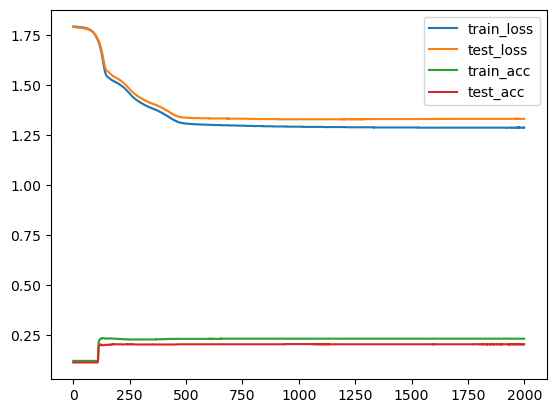

In [153]:
import torch
import numpy as np
from torch import nn, optim
import sys, importlib
import pandas as pd
#import NN
#importlib.reload(sys.modules['NN'])
#from NN import Net, elr_loss, prepare_layers



#def DNNwERLLoss(X,y,noisyLabels,beta):
for i in range(1):
    

    
    net = Net(X,y,noisyLabels)
    optimizer = optim.Adam(net.parameters(), lr=0.001)

   # criterion = elr_loss(num_examp = net.X_train.shape[0],num_classes=net.num_classes,beta = beta)
    models = []
    criterion = nn.CrossEntropyLoss()
    for epoch in range(2000):
       # print(epoch)
        y_pred = torch.squeeze(net(net.X_train))
        y_test_pred = torch.squeeze(net(net.X_test))

      #  train_loss = criterion(net.indexTrain,y_pred,net.y_train)
       # test_loss = criterion(net.indexTest,y_test_pred, net.y_test)
        train_loss = criterion(y_pred,net.y_train)
        test_loss = criterion(y_test_pred, net.y_test)

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        net.metrics(y_pred, y_test_pred,train_loss,test_loss)
        models.append(net)

        if epoch == 2000:
            test = Net(X,y,noisyLabels)
            test.load_state_dict(net.state_dict())
            test.eval()


    #pd.DataFrame(net.Metrics1,columns = ['train_loss', 'test_loss', 'train_acc', 'test_acc']).plot()
    #pd.DataFrame(net.Metrics2,columns = ['p_train', 'r_train', 'p_test', 'r_test']).plot()



    BestModelE = Net(X,y,noisyLabels)
    BestModelE.load_state_dict(net.state_dict())
    BestModelE.eval()
    # BestModelE(net.X_test)
    y_final_pred = BestModelE(net.X)#.argmax(axis = 1)
    filteredNoiseInd = np.where(net.y!=y_final_pred.argmax(axis = 1))[0]

    pd.DataFrame(net.Metrics1,columns = ['train_loss', 'test_loss', 'train_acc', 'test_acc']).plot()



In [148]:
pd.Series(net.y_test).value_counts()

5    457
4    371
0    313
3    309
2    293
1    257
dtype: int64

In [2]:
eval('True')

True

In [155]:
import torch
model, alphabet = torch.hub.load("facebookresearch/esm:main", "esm2_t33_650M_UR50D")


Downloading: "https://github.com/facebookresearch/esm/zipball/main" to /data/gpfs-1/users/nazaretl_c/.cache/torch/hub/main.zip
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/models/esm2_t33_650M_UR50D.pt" to /data/gpfs-1/users/nazaretl_c/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D.pt
Downloading: "https://dl.fbaipublicfiles.com/fair-esm/regression/esm2_t33_650M_UR50D-contact-regression.pt" to /data/gpfs-1/users/nazaretl_c/.cache/torch/hub/checkpoints/esm2_t33_650M_UR50D-contact-regression.pt


In [1]:
import esm
import torch

model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()


In [75]:
#test.load_state_dict(net.state_dict())
#test.eval()
for layer in test.children():
  #  if isinstance(layer, nn.Linear):
        print(layer.state_dict())

OrderedDict([('0.weight', tensor([[-0.1437,  0.0436,  0.2438,  0.1398,  0.1889, -0.2229,  0.1793, -0.1031,
          0.0914, -0.0979,  0.1485,  0.0536, -0.0089, -0.2287,  0.0531, -0.0291],
        [ 0.1366,  0.0558,  0.1326,  0.0160, -0.0879, -0.1871,  0.1255, -0.1842,
          0.1282,  0.1200,  0.1343, -0.2047, -0.1744, -0.1140, -0.0848, -0.1569],
        [-0.0421,  0.0449, -0.1225, -0.0503,  0.1167,  0.1923, -0.2033, -0.2176,
         -0.2233,  0.1767, -0.0674,  0.1908, -0.1931, -0.2131, -0.2483,  0.2211],
        [ 0.1467,  0.1933,  0.2382, -0.1203,  0.1475,  0.0350, -0.1268, -0.1027,
         -0.1872, -0.0900,  0.1124, -0.2373, -0.2388, -0.0199,  0.2278,  0.1298],
        [-0.0722, -0.0896, -0.2098,  0.0637, -0.0588,  0.0572,  0.0541, -0.1658,
         -0.1312, -0.2087,  0.2455,  0.1789,  0.0752, -0.1032,  0.1702,  0.1600],
        [ 0.0868,  0.0699,  0.2104,  0.1224,  0.0013, -0.0444,  0.2171,  0.1570,
          0.1835, -0.0506,  0.1871, -0.2474,  0.1958, -0.2122, -0.0981,  0.230

In [76]:
BestModelE.eval()

Net(
  (layers): ModuleList(
    (0): Linear(in_features=16, out_features=14, bias=True)
    (1): Linear(in_features=14, out_features=13, bias=True)
    (2): Linear(in_features=13, out_features=11, bias=True)
    (3): Linear(in_features=11, out_features=10, bias=True)
    (4): Linear(in_features=10, out_features=8, bias=True)
    (5): Linear(in_features=8, out_features=7, bias=True)
    (6): Linear(in_features=7, out_features=6, bias=True)
  )
)

In [66]:
a = pd.DataFrame(net.Metrics1,columns = ['train_loss', 'test_loss', 'train_acc', 'test_acc'])

a['test_acc'].max()

0.785

<AxesSubplot:>

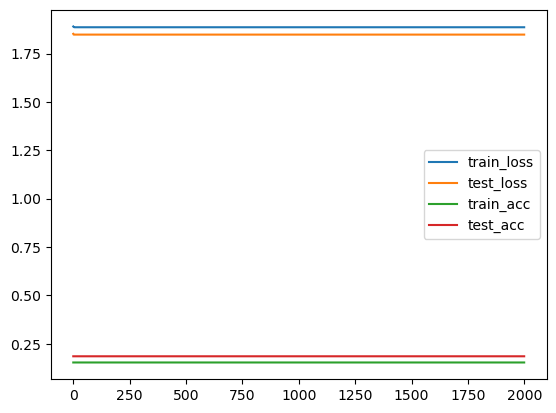

In [80]:
pd.DataFrame(net.Metrics1,columns = ['train_loss', 'test_loss', 'train_acc', 'test_acc']).plot()
#pd.DataFrame(net.Metrics2,columns = ['p_train', 'r_train', 'p_test', 'r_test']).plot()



In [17]:
BestModelE(net.X).argmax(axis = 1)==test(net.X).argmax(axis = 1)



tensor([ True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True, 

In [16]:
test(net.X).argmax(axis = 1)


tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### 

In [4]:
dfMeansCV

,Status,True Positive,False Positive,True Negative,False Negative,Execution Time,Precision,Recall,F-score,Time,ExtraInfo,NoiseInd,FoundNoiseInd
"['Pokerhand', 'ERL', 0.2, 'Sym', 1000, 0]",S,125,284,516,75,5.5838,0.3056,0.625,0.4105,1672928459.266715,beta : 0.6,"[9, 12, 13, 44, 45, 53, 60, 85, 89, 90, 92, 98...","[1, 5, 8, 9, 10, 11, 12, 13, 14, 17, 20, 21, 2..."


In [5]:
df

,0,1,2,3,4,5,6,7,8,9,Label
0,1,10,1,11,1,13,1,12,1,1,1
1,2,11,2,13,2,10,2,12,2,1,1
2,3,12,3,11,3,13,3,10,3,1,1
3,4,10,4,11,4,1,4,13,4,12,1
4,4,1,4,13,4,12,4,11,4,10,1
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


In [ ]:
mean = df.mean()


In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
df_pca= pca.fit_transform(df.iloc[:,:-2].fillna(mean))
#PCA(n_components=2)
print(pca.explained_variance_ratio_.sum())
#print(pca.singular_values_)
df_pca = pd.DataFrame(df_pca)
df_pca[['LabelOld','LabelNew']] = df[['LabelOld','LabelNew']]

In [ ]:
datasets = ["Adult","DryBean","Chess","Magic","ClinVarArt", "ClinVarReal","EncodeArt","EncodeReal", "RNA0", "RNA1", "RNA2"]
n_comps = [2,1,20,6,7,4,4,3,3,38,39,39]
n_labels = [1,1,1,1,1,2,1,2,1,1,1]
for i in range(len(datasets)):
    df = pd.read_csv('datasets/' + datasets[i] + '.csv.gz', sep = '\t',compression='zip',
                index_col=None)
    pca = PCA(n_components=n_comps[i])
    df_pca= pca.fit_transform(df.iloc[:,:-n_labels[i]].fillna(mean))
    df_pca = pd.DataFrame(df_pca)
    print(pca.explained_variance_ratio_.sum())

    df_pca = df_pca.T.append(df.iloc[:,-n_labels[i]]).T
    df_pca.to_csv('datasets/' + datasets[i] + '_PCA.csv.gz', sep = '\t',compression='zip',
                index = None)


In [ ]:
pca = PCA(n_components=39
         
         )
df_pca= pca.fit_transform(df.iloc[:,:-1].fillna(mean))
#PCA(n_components=2)
print(pca.explained_variance_ratio_.sum())

In [ ]:
n_comps = [2,1,20,6,7,4,4,3,3,38,39,39]

n_labels = [1,1,1,1,1,2,1,2,1,1,1]
i = 1

In [ ]:
df.T.append(df.iloc[:,-n_labels[i]]).T

In [ ]:
df_pca.corr()


In [ ]:
df.loc[:,['Label']]

In [ ]:
df.corrwith(df['Label']).sort_values()

In [ ]:
foundEr = foundNoiseInd
trueEr = foundNoiseInd
if ((foundEr==0) | (trueEr== 0)):
    recall, precision = 0, 0
recall

In [ ]:
if (len(foundEr)==0 | len(trueEr)==0):
    print('l')

In [ ]:
df = pd.read_csv('dataProduced/ClinVarAnnoLabels.csv', sep = '\t',
                 index_col = 'Unnamed: 0',
               # nrows=10000
                )

#cv.columns.get_loc("ConsDetail")
# ConsScore delete
cv = df.iloc[:,43:]
cv['dbscSNV-rf_score'] = cv['dbscSNV-rf_score'].replace('.',np.nan).astype(float)
cv['cHmm_E6'] = cv.loc[:,'cHmm_E6'].astype(float)
#cols = cv.columns[[2,3,7,31,50,113,117]].to_list() + cv.columns[10:18].to_list() 
cols = ['AnnoType', 'Consequence', 'ConsDetail', 'motifEName', 'oAA', 'nAA',
       'GeneID_df21', 'FeatureID', 'GeneName', 'CCDS', 'Intron', 'Exon',
       'Domain', 'Dst2SplType', 'SIFTcat', 'PolyPhenCat',
       'EnsembleRegulatoryFeature', 'dbscSNV-rf_score', 'Labels']

print('Deleting columns ', cols)
cv = cv.drop(columns = cols)#.value_counts()
cv = cv[~cv['LabelNew'].isna()]
cv = cv[~((cv['LabelNew']=='Conflicting interpretations')|(cv['LabelOld']=='Conflicting interpretations'))]

cs = {'Uncertain significance': 2,
        'Benign':0,
        'Pathogenic':1,
        'Conflicting interpretations':3}
cs_inv = {v: k for k, v in cs.items()}
cv[['LabelOld','LabelNew']] = cv[['LabelOld','LabelNew']].replace(cs)


types = cv.dtypes.replace('object','category')
cv = cv.astype(types)

In [ ]:
cv

In [ ]:
cv['motifEScoreChng'].value_counts(dropna = False)

In [ ]:
y

In [ ]:
cols = cv.dtypes[cv.dtypes=='int64'].index

In [ ]:

for col in cols: 
    display(cv[col].isna().sum())

In [ ]:
def getData(dfAll,name, a, noise_level,size):
    N = min(len(dfAll), size)
    ind = random.sample(range(len(dfAll)), N)
    if name in ['ClinVarReal', 'EncodeReal']:
        
        nErrors = int(noise_level*N)
        dfClean = dfAll[dfAll['LabelNew']==dfAll['LabelOld']]
        dfNoisy = dfAll[dfAll['LabelNew']!=dfAll['LabelOld']]
        
        if (len(dfClean)-N-nErrors) > 0:
            indClean = random.sample(list(dfClean.index), N-nErrors)
        else:
            indClean = random.choices(list(dfClean.index),k = N-nErrors)

        if (len(dfNoisy) - nErrors) > 0:
            indNoisy = random.sample(list(dfNoisy.index), nErrors)
        else:
            indNoisy = random.choices(list(dfNoisy.index), k = nErrors)
            
        ind = indClean + indNoisy
        df = dfAll.iloc[ind,:].reset_index(drop = True).sample(frac=1)

        X = df.iloc[:,:-2]
        y = df.loc[:,'LabelNew'].astype(int)
        noisyLabels = df.loc[:,'LabelOld'].astype(int)#.reset_index(drop = True)
        no = (y!=noisyLabels).sum()
       # print('Number of errors: ', no) 
    else:

        df = dfAll.iloc[ind,:].reset_index(drop = True)
        X = df.iloc[:,:-1]#.reset_index(drop = True)
        y = df.loc[:,'Label'].astype(int)#.reset_index(drop = True)
        display(y.value_counts(dropna = False))
        uniform, cc, bcn = addNoiseScikit(X, y, noise_level = noise_level)
        if a=='Sym':
            noisyLabels = pd.Series(uniform)
        else:
            noisyLabels = pd.Series(bcn)
            
    X = X[X.columns[X.nunique() > 1]]     #delete columns w/o variability    
            
    return X, y, noisyLabels

In [ ]:
X, y, noisyLabels = getData(df,name, noiseType, noiseLevel, datasetSize)

In [ ]:
import pandas as pd
import numpy as np
from skclean.simulate_noise import flip_labels_uniform
from skclean.simulate_noise import flip_labels_cc # Class Conditional Noise:
from skclean.simulate_noise import UniformNoise
from skclean.simulate_noise import CCNoise
from skclean.simulate_noise import BCNoise
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def addNoiseScikit(data, labels, noise_level = 0.2, rs = 3423, classifier = LinearDiscriminantAnalysis()):
 #   lcm = getTransitionMatrix(data, labels,normalize = True, noiseLevel = noise_level)
  #  print(lcm)
    noisyLabelsUniform = flip_labels_uniform(labels, noise_level = noise_level, random_state = rs)
   # noisyLabelsCC = flip_labels_cc(labels,lcm = lcm,random_state = rs)
    bcnoise = BCNoise(noise_level = noise_level, classifier = classifier , random_state = rs)
    noisyLabelsBCNoise = bcnoise.simulate_noise(data, labels)[1]
    
    return noisyLabelsUniform, None, noisyLabelsBCNoise

X = df.iloc[:,:-1]
X

In [10]:
df = pd.read_csv('dataProduced/ClinVarAnnoLabels.csv',sep = '\t')

/data/gpfs-1/scratch/users/nazaretl_c/tmp/ipykernel_2927727/2176180905.py:1: DtypeWarning: Columns (19,38,51,73,158) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataProduced/ClinVarAnnoLabels.csv',sep = '\t')


In [52]:
df['LabelNew'].value_counts()
df.shape

(726434, 164)

In [56]:
df

,Unnamed: 0,#AlleleID,Type_joined,Name,GeneID_joined,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),nsv/esv (dbVar),RCVaccession,PhenotypeIDS,PhenotypeList,Origin,OriginSimple,Assembly,ChromosomeAccession,Chromosome,Start,Stop,ReferenceAllele,AlternateAllele,Cytogenetic,ReviewStatus,NumberSubmitters,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,Position,ID,CS,#Chrom,Pos,Ref,Alt,Type_df21,Length,AnnoType,Consequence,ConsScore,ConsDetail,GC,CpG,...,GerpRSpval,GerpN,GerpS,tOverlapMotifs,motifDist,EncodeH3K4me1-sum,EncodeH3K4me1-max,EncodeH3K4me2-sum,EncodeH3K4me2-max,EncodeH3K4me3-sum,EncodeH3K4me3-max,EncodeH3K9ac-sum,EncodeH3K9ac-max,EncodeH3K9me3-sum,EncodeH3K9me3-max,EncodeH3K27ac-sum,EncodeH3K27ac-max,EncodeH3K27me3-sum,EncodeH3K27me3-max,EncodeH3K36me3-sum,EncodeH3K36me3-max,EncodeH3K79me2-sum,EncodeH3K79me2-max,EncodeH4K20me1-sum,EncodeH4K20me1-max,EncodeH2AFZ-sum,EncodeH2AFZ-max,EncodeDNase-sum,EncodeDNase-max,EncodetotalRNA-sum,EncodetotalRNA-max,Grantham,Dist2Mutation,Freq100bp,Rare100bp,Sngl100bp,Freq1000bp,Rare1000bp,Sngl1000bp,Freq10000bp,Rare10000bp,Sngl10000bp,EnsembleRegulatoryFeature,dbscSNV-ada_score,dbscSNV-rf_score,RemapOverlapTF,RemapOverlapCL,Labels,LabelOld,LabelNew
0,1-100007038-C-T,626464,single nucleotide variant,NM_012243.3(SLC35A3):c.347C>T (p.Thr116Met),23443,SLC35A3,HGNC:11023,Uncertain significance,0,"Dec 10, 2018",774263178,-,RCV000811663|RCV001274671,"MONDO:MONDO:0014248,MedGen:C3809910,OMIM:61555...","Arthrogryposis, mental retardation, and seizur...",germline,germline,GRCh38,NC_000001.11,1,100007038,100007038,na,na,1p21.2,"criteria provided, single submitter",2,-,N,-,2,655475,100007038,C,T,1-100007038-100007038,1-100007038-100007038-626464,Uncertain significance,1,100007038,C,T,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,0.2910,0.0270,...,0.0000,18.7000,18.7000,NaN,NaN,4.3977,1.4703,4.4404,1.3132,2.5848,0.8427,3.1956,1.2362,6.8864,1.4836,11.3446,2.6764,4.2956,1.2144,10.8377,2.0532,18.3386,5.0644,7.8601,1.8008,4.8029,1.3310,0.1230,0.0590,7.8109,1.5904,81.0000,19.0000,1.0000,0.0000,17.0000,1.0000,3.0000,112.0000,13.0000,54.0000,1186.0000,NaN,NaN,NaN,2.0000,2.0000,['Uncertain significance'],Uncertain significance,Uncertain significance
1,1-100007039-G-A,731499,single nucleotide variant,NM_012243.3(SLC35A3):c.348G>A (p.Thr116=),23443,SLC35A3,HGNC:11023,Likely benign,0,"Dec 31, 2019",574333514,-,RCV000895332|RCV001275500,"MONDO:MONDO:0014248,MedGen:C3809910,OMIM:61555...","Arthrogryposis, mental retardation, and seizur...",germline,germline,GRCh38,NC_000001.11,1,100007039,100007039,na,na,1p21.2,"criteria provided, single submitter",2,-,N,-,2,721777,100007039,G,A,1-100007039-100007039,1-100007039-100007039-731499,Benign,1,100007039,G,A,SNV,0,CodingTranscript,SYNONYMOUS,5,synonymous,0.2980,0.0270,...,0.0000,18.7000,-37.4000,NaN,NaN,4.3051,1.4703,4.3798,1.3132,2.5848,0.8427,3.1956,1.2362,6.4075,1.4836,10.8514,2.6764,4.2956,1.2144,11.1590,2.0532,17.7603,4.6424,7.8601,1.8008,4.7471,1.3310,0.1230,0.0590,7.7670,1.6203,NaN,3.0000,1.0000,0.0000,17.0000,1.0000,3.0000,112.0000,13.0000,54.0000,1187.0000,NaN,NaN,NaN,2.0000,2.0000,['Benign'],Benign,Benign
2,1-100007046-T-C,745484,single nucleotide variant,NM_012243.3(SLC35A3):c.355T>C (p.Leu119=),23443,SLC35A3,HGNC:11023,Likely benign,0,"Dec 31, 2019",1297581482,-,RCV000919489,"MONDO:MONDO:0014248,MedGen:C3809910,OMIM:61555...","Arthrogryposis, mental retardation, and seizures",germline,germline,GRCh38,NC_000001.11,1,100007046,100007046,na,na,1p21.2,"criteria provided, single submitter",1,-,N,-,2,743157,100007046,T,C,1-100007046-100007046,1-100007046-100007046-745484,Benign,1,100007046,T,C,SNV,0,CodingTranscript,SYNONYMOUS,5,synonymous,0.3180,0.0270,...,0.0000,18.7000,18.7000,NaN,NaN,4.1212,1.2864,3.8551,0.9571,2.7343,0.8427,3.1715,1.2362,6.6866,1.4836,10.8352,2.6764,3.4355,1.2144,10.5555,2.0532,15.8808,4.2205,7.4958,1.9374,4.6082,1.3310,0.0795,0.0146,8.5985,1

In [24]:
test = df[(df['LabelNew']!='Conflicting interpretations')&(df['LabelOld']!='Conflicting interpretations')]

In [25]:
(test['LabelNew']!=test['LabelOld']).sum()

16639

In [19]:
pd.crosstab(df['LabelOld'],df['LabelNew'])

LabelNew,Benign,Conflicting interpretations,Pathogenic,Uncertain significance
LabelOld,,,,
Benign,237392,15941,20,1236
Conflicting interpretations,134,1020,29,34
Pathogenic,436,4468,79991,2737
Uncertain significance,10451,23090,1706,347696


In [51]:
c = pd.crosstab(test['LabelOld'],test['LabelNew'], margins = True, dropna = True)
c

LabelNew,Benign,Pathogenic,Uncertain significance,All
LabelOld,,,,
Benign,237392,20,1236,238648
Pathogenic,436,79991,2737,83164
Uncertain significance,10451,1706,347696,359853
All,248279,81717,351669,681665


In [28]:
noisy = test[test['LabelNew']!=test['LabelOld']]

In [54]:
noisy['LabelNew'].value_counts(dropna = False)

Benign                    10887
Uncertain significance     3973
Pathogenic                 1726
NaN                          53
Name: LabelNew, dtype: int64

In [30]:
noisy['LabelOld'].value_counts()

Uncertain significance    12157
Pathogenic                 3173
Benign                     1256
Name: LabelOld, dtype: int64

In [35]:
np.trace(c.to_numpy())-c.sum().sum()

-16586

In [38]:
test.shape[0]-np.trace(c.to_numpy())

16639

In [42]:
len(test['Unnamed: 0'].unique())


681718

In [55]:
test.shape[0]-726434-52

-44768

In [50]:
test[test['LabelOld'].isna()]

,Unnamed: 0,#AlleleID,Type_joined,Name,GeneID_joined,GeneSymbol,HGNC_ID,ClinicalSignificance,ClinSigSimple,LastEvaluated,RS# (dbSNP),nsv/esv (dbVar),RCVaccession,PhenotypeIDS,PhenotypeList,Origin,OriginSimple,Assembly,ChromosomeAccession,Chromosome,Start,Stop,ReferenceAllele,AlternateAllele,Cytogenetic,ReviewStatus,NumberSubmitters,Guidelines,TestedInGTR,OtherIDs,SubmitterCategories,VariationID,PositionVCF,ReferenceAlleleVCF,AlternateAlleleVCF,Position,ID,CS,#Chrom,Pos,Ref,Alt,Type_df21,Length,AnnoType,Consequence,ConsScore,ConsDetail,GC,CpG,...,GerpRSpval,GerpN,GerpS,tOverlapMotifs,motifDist,EncodeH3K4me1-sum,EncodeH3K4me1-max,EncodeH3K4me2-sum,EncodeH3K4me2-max,EncodeH3K4me3-sum,EncodeH3K4me3-max,EncodeH3K9ac-sum,EncodeH3K9ac-max,EncodeH3K9me3-sum,EncodeH3K9me3-max,EncodeH3K27ac-sum,EncodeH3K27ac-max,EncodeH3K27me3-sum,EncodeH3K27me3-max,EncodeH3K36me3-sum,EncodeH3K36me3-max,EncodeH3K79me2-sum,EncodeH3K79me2-max,EncodeH4K20me1-sum,EncodeH4K20me1-max,EncodeH2AFZ-sum,EncodeH2AFZ-max,EncodeDNase-sum,EncodeDNase-max,EncodetotalRNA-sum,EncodetotalRNA-max,Grantham,Dist2Mutation,Freq100bp,Rare100bp,Sngl100bp,Freq1000bp,Rare1000bp,Sngl1000bp,Freq10000bp,Rare10000bp,Sngl10000bp,EnsembleRegulatoryFeature,dbscSNV-ada_score,dbscSNV-rf_score,RemapOverlapTF,RemapOverlapCL,Labels,LabelOld,LabelNew
7299,1-12006643-G-A,1036633,single nucleotide variant,NM_014874.4(MFN2):c.1822G>A (p.Ala608Thr),9927,MFN2,HGNC:16877,Uncertain significance,0,"Apr 01, 2021",-1,-,RCV001353146,"MONDO:MONDO:0012231,MedGen:C4721887,OMIM:60926...","Charcot-Marie-Tooth disease, type 2A2A",unknown,unknown,GRCh38,NC_000001.11,1,12006643,12006643,na,na,1p36.22,no assertion criteria provided,1,-,N,-,2,1048590,12006643,G,A,1-12006643-12006643,1-12006643-12006643-1036633,Uncertain significance,1,12006643,G,A,SNV,0,CodingTranscript,NON_SYNONYMOUS,7,missense,0.5890,0.0400,...,0.0000,18.7000,18.7000,NaN,NaN,11.5214,6.3031,10.5873,6.1972,6.8031,2.8655,10.7391,2.7028,6.9541,1.5929,8.6038,3.0326,4.4445,1.0416,99.4018,22.5734,11.7893,3.4275,22.7913,6.1995,6.3254,1.5175,1.0988,0.3865,17.0886,4.1907,58.0000,9.0000,0.0000,0.0000,9.0000,1.0000,4.0000,142.0000,15.0000,71.0000,1402.0000,NaN,NaN,NaN,8.0000,9.0000,[],NaN,NaN
7758,1-1336516-C-T,969551,single nucleotide variant,NM_001330311.2(DVL1):c.1715-1G>A,1855,DVL1,HGNC:3084,Likely pathogenic,1,"Oct 22, 2019",-1,-,RCV001353069,"MONDO:MONDO:0014591,MedGen:C4225363,OMIM:61633...","Robinow syndrome, autosomal dominant 2",unknown,unknown,GRCh38,NC_000001.11,1,1336516,1336516,na,na,1p36.33,no assertion criteria provided,1,-,N,-,2,981468,1336516,C,T,1-1336516-1336516,1-1336516-1336516-969551,Pathogenic,1,1336516,C,T,SNV,0,Transcript,CANONICAL_SPLICE,6,splice_acceptor,0.7150,0.1730,...,0.0000,17.0000,17.0000,NaN,NaN,1.8244,0.8229,3.8300,1.2672,3.9358,1.6105,3.5859,0.7870,2.4210,1.6492,4.1654,1.2218,0.8844,0.5695,14.1944,3.2292,5.5333,1.3097,22.8376,6.9622,2.5292,2.2376,0.7972,0.3918,0.7555,0.2601,NaN,3.0000,1.0000,3.0000,33.0000,1.0000,13.0000,295.0000,18.0000,107.0000,2636.0000,Promoter Flanking Region,1.0000,0.932,11.0000,14.0000,[],NaN,NaN
68257,10-31520683-C-T,27671,single nucleotide variant,NM_001174096.2(ZEB1):c.1351C>T (p.Gln451Ter),6935,ZEB1,HGNC:11642,Pathogenic,1,"Nov 01, 2005",-1,-,RCV000013467,"MONDO:MONDO:0012200,MedGen:C1836724,OMIM:60914...",Posterior polymorphous corneal dystrophy 3,germline,germline,GRCh38,NC_000010.11,10,31520683,31520683,na,na,10p11.22,no assertion criteria provided,1,-,N,OMIM:189909.0002,1,12632,31520683,C,T,10-31520683-31520683,10-31520683-31520683-27671,Pathogenic,10,31520683,C,T,SNV,0,CodingTranscript,STOP_GAINED,8,stop_gained,0.3840,0.0000,...,0.0000,18.7000,15.9000,NaN,NaN,6.5353,1.6022,6.3079,1.7700,8.8396,1.7776,10.1288,1.9433,12.9542,2.3072,8.3273,1.5063,6.4066,1.7546,39.7362,7.4526,22.7894,6.2588,10.3351,2.0994,5.9060,1.5697,0.1934,0.0520,12.8374,3.1466,NaN,16.0000,0.0000,0.0000,12.0000,0.0000,2.0000,106.0000,4.0000,52.0000,1256.0000,NaN,NaN,NaN,3.0000,3.0000,[],NaN,NaN
113697,11-47359855-G-A,9773